In [2]:
import pandas as pd

# CSV dosyasını yükleyelim
file_path = 'stemmed_data.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()

,text_stemmed_sentences,ingredient_stemmed_sentences,name_stemmed_sentences
0,put cottag chees wide bowl add egg sugar flour...,chicken egg piec soft cottag chees g wheat flo...,breakfast lazi
1,rins buckwheat pour cup boil water salt cover ...,buckwheat cereal cup chop parsley tast chop ci...,breek breakfast
2,grate carrot green appl middl zest juic halv c...,carrot piec appl piec orang piec raisin g hone...,childhood breakfast
3,mix egg piec loaf egg mixtur veget oil side,baton piec milk tablespoon chicken egg piec sa...,french crouton breakfast
4,boil egg chees tast,green salad bundl chicken egg piec tomato piec...,low breakfast


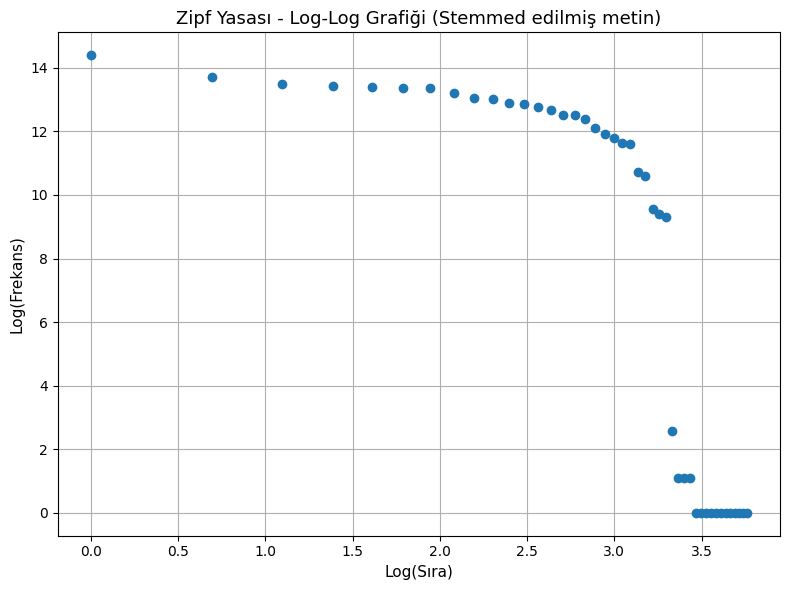

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# NaN olmayan satırları al
text_column = df['text_stemmed_sentences'].dropna()

# Tüm kelimeleri tek listeye düzleştir
words = [token for sentence_list in text_column for sentence in sentence_list for token in sentence]

# Kelime frekanslarını say
word_counts = Counter(words)

# Azalan sıralama
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Kelimeleri ve frekansları ayır
words, freqs = zip(*sorted_word_counts)

# Log-log grafiği için frekansların ve sıraların log'u
log_freqs = np.log(freqs)
log_ranks = np.log(range(1, len(freqs) + 1))

# Grafik çizimi
plt.figure(figsize=(8, 6))
plt.plot(log_ranks, log_freqs, marker='o', linestyle='None')

# Grafik başlığı ve etiketler
plt.title("Zipf Yasası - Log-Log Grafiği (Stemmed edilmiş metin)", fontsize=13)
plt.xlabel("Log(Sıra)", fontsize=11)
plt.ylabel("Log(Frekans)", fontsize=11)

plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
print(f"Veri çerçevesi boyutu: {df.shape}")  # (satır sayısı, sütun sayısı)

Veri çerçevesi boyutu: (37637, 3)


In [5]:
initial_rows = len(df)
print(f"Başlangıçtaki veri satırı: {initial_rows}")

Başlangıçtaki veri satırı: 37637


In [6]:
df_cleaned = df.dropna(subset=['text_stemmed_sentences'])  # Boş satırları sil
final_rows = len(df_cleaned)
print(f"Temizlenmiş veri satırı: {final_rows}")

Temizlenmiş veri satırı: 37637


In [7]:
print(f"Elenen satır sayısı: {initial_rows - final_rows}")

Elenen satır sayısı: 0


In [9]:
words = [word for sentence_list in df_cleaned['text_stemmed_sentences'] 
         for sentence in sentence_list for word in sentence]

print(f"Toplam kelime sayısı: {len(words)}")



Toplam kelime sayısı: 10527248


In [10]:
unique_words = set(words)
print(f"Eşsiz kelime sayısı: {len(unique_words)}")


Eşsiz kelime sayısı: 43
